In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as tck
import sympy as sym
import warnings
from IPython.display import display, Math
from numpy.lib.scimath import sqrt as csqrt

### Functions and signal parameters

In [66]:
def f(x):
    #return np.cos(2*60*np.pi*x) + 2*np.cos(2*600*np.pi*x) # Function
    return 2*np.cos(2*40*np.pi*x)

def hdSin(x, wc, M):
    return np.sin(wc*(x-M))/(np.pi*(x-M))

SPoints = 160


Text(0.5, 1.0, 'Function Y')

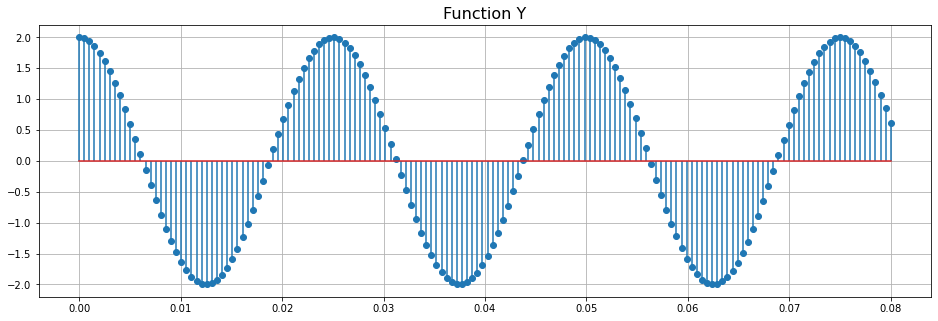

In [73]:
Lims = [0,8e-2]   # Sample limits
Fs = 2000 # Sample frequency

SPoints = int(Fs*(Lims[1] - Lims[0]))    # Sample points
print(f"SPoints = {SPoints}")
Xs = np.linspace(Lims[0],Lims[1],SPoints)
Ys = f(Xs)

plt.figure(figsize=(16,5))
plt.grid(True)
plt.stem(Xs,Ys)
plt.title("Function Y", fontsize=16)

[-1.55926873e-17 -2.16236208e-02 -1.43921428e-02  1.55914881e-02
  2.75209720e-02 -1.55926873e-17 -3.36367435e-02 -2.33872321e-02
  2.67282653e-02  5.04551152e-02 -1.55926873e-17 -7.56826729e-02
 -6.23659523e-02  9.35489284e-02  3.02730691e-01  4.00000000e-01
  3.02730691e-01  9.35489284e-02 -6.23659523e-02 -7.56826729e-02
 -1.55926873e-17  5.04551152e-02  2.67282653e-02 -2.33872321e-02
 -3.36367435e-02 -1.55926873e-17  2.75209720e-02  1.55914881e-02
 -1.43921428e-02 -2.16236208e-02]


Text(0.5, 0, 'f(Hz)')

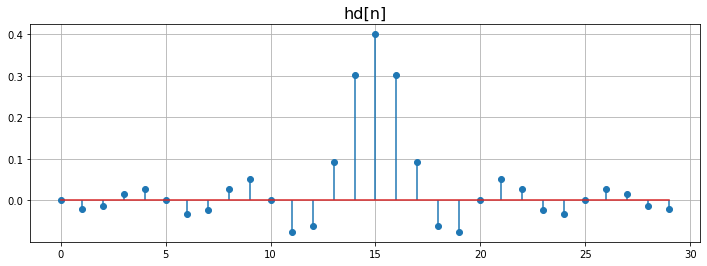

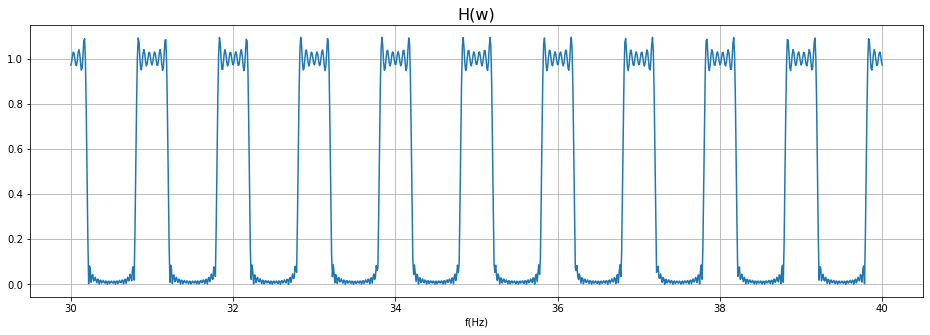

In [80]:
FOrder = 30 # Filter order
CutF = 400 # Cutoff frequency (Hz)

wc = 2*np.pi*CutF/Fs
w = np.ones(FOrder)
hd = np.zeros(FOrder)

for i in range(len(hd)):
    if(i == FOrder/2):
        hd[i] = wc/np.pi
    else:
        hd[i] = hdSin(i,wc,FOrder/2)

plt.figure(figsize=(12,4))
plt.grid(True)
plt.stem(np.arange(0,len(hd),1),hd)
plt.title("hd[n]", fontsize=16)

h = np.multiply(w,hd)
print(h)
FreqPoints = 1000  # Frequency points for calculing H(n)

NormW = np.linspace(30*2*np.pi, 40*2*np.pi, FreqPoints) 
HArray = np.zeros(FreqPoints, dtype=complex)
for j in range(len(NormW)):
    HResp = 0
    for i in range(len(h)):
        HResp = HResp + h[i]*np.exp(-1j*NormW[j]*i)
    HArray[j] = HResp
    

plt.figure(figsize=(16,5))
plt.grid(True)
plt.plot(NormW/(2*np.pi),np.abs(HArray))
plt.title("H(w)", fontsize=16)
plt.xlabel("f(Hz)")

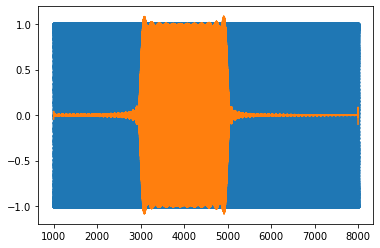

In [3]:
"""Finite Impulse Filters."""
import numpy as np
import matplotlib.pyplot as plt


def FIRlow(W, N):
    """Low pass filter kernel."""
    n = np.arange(-N, N + 1)
    return W / np.pi * np.sinc(W / np.pi * n)


def test(n):
    """Simple test."""
    x = np.arange(10)
    print(x)


def FIRbandpass(Wlow, Whigh, N):
    """Return convolution kernel for bandpass filter."""
    return FIRlow(Whigh, N) - FIRlow(Wlow, N)


def f2W(f, fs):
    """From freq in hz to freq in rad/s."""
    return 2 * np.pi * f / fs


def generate_chirp(startf, endf, fs, duration):
    """Generate chirp signal."""
    N = int(duration * fs)
    t = np.linspace(0, duration, N)
    phase = 2 * np.pi * (startf * t + (endf - startf) / duration / 2 * t**2)
    ft = startf + (endf-startf) / duration*t
    return t, ft, np.sin(phase)


def test_bandpass():
    """Test the bandpass filter by feeding it a chirp signal."""
    t, ft, x = generate_chirp(1000.0, 8000.0, 44100.0, 3.0)
    plt.plot(ft, x, '.-')

    fs = 44100
    flow = 3000
    fhigh = 5000
    N = 256
    w = FIRbandpass(f2W(flow, fs), f2W(fhigh, fs), N)
    y = np.convolve(x, w, mode='same')
    plt.plot(ft, y)


if __name__=='__main__':
    test_bandpass()
    plt.show()